In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from basecall_viz_utils import get_signal_basecall_for_plotting
%load_ext autoreload
%autoreload 2

In [2]:
df=pd.read_csv('probas_df_liver_sample.csv')
rid_tokens=pd.read_csv('readids_tokens.csv')
print(rid_tokens.head())
df.drop('Unnamed: 0',axis=1,inplace=True)
df['pred_proba']=df[['UNM','h5mC','pU','m5C','m6A']].max(axis=1)
mods=['UNM','h5mC','pU','m5C','m6A']
df['pred']=[mods[pred] for pred in df.pred.tolist()]
df

                                     read_id  token
0  read_000f053d-c698-420f-bc8d-7f44b934dadc      0
1  read_0011b017-55a0-4346-bfb6-20534b590b33      1
2  read_0017e079-615d-4d93-9696-2a4d99ffa5e5      2
3  read_00207be8-2dad-4399-86d6-c62d8e93aa14      3
4  read_0057a40c-0a71-44e8-a579-56699f709403      4


,read_id_token,chunk_idx,UNM,h5mC,pU,m5C,m6A,pred,pred_proba
0,0,0,0.000249,0.824903,0.174680,0.000046,0.000122,h5mC,0.824903
1,0,1,0.058506,0.635404,0.058752,0.008317,0.239021,h5mC,0.635404
2,0,2,0.033272,0.715636,0.174905,0.003061,0.073126,h5mC,0.715636
3,0,3,0.034544,0.534920,0.355440,0.026360,0.048736,h5mC,0.534920
4,0,4,0.078068,0.422595,0.458745,0.006457,0.034135,pU,0.458745
...,...,...,...,...,...,...,...,...,...
995,6,89,0.010160,0.065450,0.841774,0.067664,0.014952,pU,0.841774
996,6,90,0.134919,0.150707,0.154048,0.024783,0.535544,m6A,0.535544
997,6,91,0.139232,0.257121,0.416885,0.054151,0.132610,pU,0.416885
998,6,92,0.524944,0.037359,0.064971,0.349906,0.022819,UNM,0.524944


In [3]:
df_max=df#[df.pred_proba > .95]
df_max.head()

,read_id_token,chunk_idx,UNM,h5mC,pU,m5C,m6A,pred,pred_proba
0,0,0,0.000249,0.824903,0.174680,0.000046,0.000122,h5mC,0.824903
1,0,1,0.058506,0.635404,0.058752,0.008317,0.239021,h5mC,0.635404
2,0,2,0.033272,0.715636,0.174905,0.003061,0.073126,h5mC,0.715636
3,0,3,0.034544,0.534920,0.355440,0.026360,0.048736,h5mC,0.534920
4,0,4,0.078068,0.422595,0.458745,0.006457,0.034135,pU,0.458745


In [4]:
rids=rid_tokens.loc[rid_tokens.token.isin(df_max.read_id_token.unique()),'read_id']
rids.shape

(7,)

In [5]:
rid_tokens.set_axis(['read_id','read_id_token'],axis=1,inplace=True)

In [6]:
signals=pd.read_pickle('/home/tcastigl/concat_liver_df.pkl')
signals=signals[signals.read_id.isin(rids)]
signals.reset_index(inplace=True)
signals

,index,read_id,signal,move,trace,seq,stride,first_sample_template
0,0,read_000f053d-c698-420f-bc8d-7f44b934dadc,"[438, 450, 448, 446, 452, 461, 456, 440, 449, ...","[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[26, 56, 2, 170, 0, 0, 0, 2], [31, 55, 1, 166...",GGGCUCUGUCUCCUCAGCCUCGGUCACCCCAGUUCUAAGGGACAGC...,10,400
1,1,read_0011b017-55a0-4346-bfb6-20534b590b33,"[389, 394, 395, 394, 389, 395, 384, 386, 393, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[6, 235, 1, 11, 0, 0, 0, 2], [229, 13, 2, 11,...",ACCCUUAGCCUUGGCAAAAUGAAGUGGGUAACCUUUCCUCCUCCUC...,10,424
2,2,read_0017e079-615d-4d93-9696-2a4d99ffa5e5,"[436, 433, 430, 441, 410, 398, 398, 426, 396, ...","[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, ...","[[42, 4, 16, 192, 1, 0, 0, 0], [176, 3, 18, 50...",AACCCCACUAGCCUCUGGCAAAAUGAAGUGGGUAACCUUUCCUCCU...,10,6116
3,3,read_00207be8-2dad-4399-86d6-c62d8e93aa14,"[868, 428, 416, 418, 416, 420, 407, 425, 414, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[8, 53, 8, 174, 4, 1, 0, 8], [23, 35, 7, 167,...",GGGCCACCGGCAAGAUGGCGGGCCGCGGCCACCGGCCUGCGCCAAG...,10,6083
4,4,read_0057a40c-0a71-44e8-a579-56699f709403,"[528, 422, 441, 437, 445, 396, 422, 411, 442, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[10, 24, 1, 216, 1, 0, 0, 3], [7, 21, 2, 214,...",ACUCAUGCAUAUCAUAGUUAAUCCAAGUCCAUGACCAUUAACUGGA...,10,400
5,5,read_0065cf58-4122-4d99-8bad-ee5ba795c829,"[422, 441, 433, 440, 442, 450, 426, 446, 439, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[10, 135, 3, 50, 1, 0, 0, 56], [10, 137, 3, 5...",GGCGCGUCGCGUGUUCACCUCGCCUGCUGAGGCGCCCGCGGCUGCA...,10,492
6,6,read_006bb39d-517d-40bd-8136-1cf923fa6eda,"[498, 475, 467, 459, 455, 468, 449, 423, 409, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[15, 158, 52, 29, 0, 0, 0, 0], [12, 154, 60, ...",GGUGCCAUGAUCCGGAACGGGCACAGGGCUGCCAGCAGCGCAGGCU...,10,6114


In [15]:
mods_l=[]
signals_mods_idxs_l=[]
for r in df_max.read_id_token.unique():
    rid=rid_tokens.loc[rid_tokens.read_id_token ==  r,'read_id'].item()
    mods=df_max[df_max.read_id_token==r].pred.tolist()
    signal_chunks_idx=[list(range(500*df_max.chunk_idx.loc[i],500*(df_max.chunk_idx.loc[i]+1))) for i in df_max.loc[df_max.read_id_token == r].index]
    mods_l.extend([mods])
    signals_mods_idxs_l.extend([signal_chunks_idx])
    #signals.loc[signals.read_id == rid,'mods']=mods
    #print(signals.loc[signals.read_id == rid,'mods'])
    #signals.loc[signals.read_id == rid,'signal_mod_idxs']=signal_chunks_idx
signals['mods']=mods_l
signals['signal_mods_idxs']=signals_mods_idxs_l
signals
    

,index,read_id,signal,move,trace,seq,stride,first_sample_template,mods,signal_mods_idxs
0,0,read_000f053d-c698-420f-bc8d-7f44b934dadc,"[438, 450, 448, 446, 452, 461, 456, 440, 449, ...","[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[26, 56, 2, 170, 0, 0, 0, 2], [31, 55, 1, 166...",GGGCUCUGUCUCCUCAGCCUCGGUCACCCCAGUUCUAAGGGACAGC...,10,400,"[h5mC, h5mC, h5mC, h5mC, pU, pU, m6A, m6A, m6A...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
1,1,read_0011b017-55a0-4346-bfb6-20534b590b33,"[389, 394, 395, 394, 389, 395, 384, 386, 393, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[6, 235, 1, 11, 0, 0, 0, 2], [229, 13, 2, 11,...",ACCCUUAGCCUUGGCAAAAUGAAGUGGGUAACCUUUCCUCCUCCUC...,10,424,"[pU, h5mC, pU, UNM, pU, UNM, h5mC, pU, h5mC, p...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
2,2,read_0017e079-615d-4d93-9696-2a4d99ffa5e5,"[436, 433, 430, 441, 410, 398, 398, 426, 396, ...","[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, ...","[[42, 4, 16, 192, 1, 0, 0, 0], [176, 3, 18, 50...",AACCCCACUAGCCUCUGGCAAAAUGAAGUGGGUAACCUUUCCUCCU...,10,6116,"[h5mC, h5mC, h5mC, h5mC, pU, UNM, h5mC, pU, m6...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
3,3,read_00207be8-2dad-4399-86d6-c62d8e93aa14,"[868, 428, 416, 418, 416, 420, 407, 425, 414, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[8, 53, 8, 174, 4, 1, 0, 8], [23, 35, 7, 167,...",GGGCCACCGGCAAGAUGGCGGGCCGCGGCCACCGGCCUGCGCCAAG...,10,6083,"[h5mC, h5mC, pU, UNM, h5mC, m6A, m6A, h5mC, h5...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
4,4,read_0057a40c-0a71-44e8-a579-56699f709403,"[528, 422, 441, 437, 445, 396, 422, 411, 442, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[10, 24, 1, 216, 1, 0, 0, 3], [7, 21, 2, 214,...",ACUCAUGCAUAUCAUAGUUAAUCCAAGUCCAUGACCAUUAACUGGA...,10,400,"[h5mC, pU, pU, pU, pU, m6A, pU, h5mC, m6A, h5m...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
5,5,read_0065cf58-4122-4d99-8bad-ee5ba795c829,"[422, 441, 433, 440, 442, 450, 426, 446, 439, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[10, 135, 3, 50, 1, 0, 0, 56], [10, 137, 3, 5...",GGCGCGUCGCGUGUUCACCUCGCCUGCUGAGGCGCCCGCGGCUGCA...,10,492,"[h5mC, pU, pU, pU, h5mC, pU, pU, h5mC, h5mC, m...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
6,6,read_006bb39d-517d-40bd-8136-1cf923fa6eda,"[498, 475, 467, 459, 455, 468, 449, 423, 409, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[15, 158, 52, 29, 0, 0, 0, 0], [12, 154, 60, ...",GGUGCCAUGAUCCGGAACGGGCACAGGGCUGCCAGCAGCGCAGGCU...,10,6114,"[h5mC, h5mC, pU, h5mC, pU, m6A, pU, m6A, h5mC,...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."


In [8]:
signals.move.loc[0]

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [9]:
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)
    if (a_set & b_set):
        return True 
    else:
        return False

In [13]:
%reload_ext autoreload

In [18]:
mod_seqs=[]
chunk_idx_l=[]
for i,row in signals.iterrows():
    print(f'read {i} over {len(signals)}')
    _,basecall=get_signal_basecall_for_plotting(signals, row.read_id)
    for j,sign_mod in enumerate(row.signal_mods_idxs):
        mod_seq_bases=[]
        for base in basecall:
            if sign_mod[0]-1000 < base['start'] < sign_mod[-1]+1000:
                if common_member(list(range(base['start'],base['end'])),sign_mod):
                    mod_seq_bases.extend(base['base'])
        mod_seq=''.join(mod_seq_bases)
        mod_seqs.extend([mod_seq])
        chunk_idx_l.extend([sign_mod])
print(len(chunk_idx_l))
print(len(mod_seqs))

read 0 over 7
read 1 over 7
read 2 over 7
read 3 over 7
read 4 over 7
read 5 over 7
read 6 over 7
1000
1000


In [19]:
df['seq']=mod_seqs
df['chunk_idxs']=chunk_idx_l
df_map=df.merge(rid_tokens, on='read_id_token',how='inner')
df_map=df_map[['read_id','seq','chunk_idxs','UNM','h5mC','pU','m5C','pred','pred_proba']]
df_map

,read_id,seq,chunk_idxs,UNM,h5mC,pU,m5C,pred,pred_proba
0,read_000f053d-c698-420f-bc8d-7f44b934dadc,GGG,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000249,0.824903,0.174680,0.000046,h5mC,0.824903
1,read_000f053d-c698-420f-bc8d-7f44b934dadc,GC,"[500, 501, 502, 503, 504, 505, 506, 507, 508, ...",0.058506,0.635404,0.058752,0.008317,h5mC,0.635404
2,read_000f053d-c698-420f-bc8d-7f44b934dadc,CU,"[1000, 1001, 1002, 1003, 1004, 1005, 1006, 100...",0.033272,0.715636,0.174905,0.003061,h5mC,0.715636
3,read_000f053d-c698-420f-bc8d-7f44b934dadc,U,"[1500, 1501, 1502, 1503, 1504, 1505, 1506, 150...",0.034544,0.534920,0.355440,0.026360,h5mC,0.534920
4,read_000f053d-c698-420f-bc8d-7f44b934dadc,UCUG,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.078068,0.422595,0.458745,0.006457,pU,0.458745
...,...,...,...,...,...,...,...,...,...
995,read_006bb39d-517d-40bd-8136-1cf923fa6eda,CCGGCCUAC,"[44500, 44501, 44502, 44503, 44504, 44505, 445...",0.010160,0.065450,0.841774,0.067664,pU,0.841774
996,read_006bb39d-517d-40bd-8136-1cf923fa6eda,CACUUUGA,"[45000, 45001, 45002, 45003, 45004, 45005, 450...",0.134919,0.150707,0.154048,0.024783,m6A,0.535544
997,read_006bb39d-517d-40bd-8136-1cf923fa6eda,ACAAGGAAGUAAACC,"[45500, 45501, 45502, 45503, 45504, 45505, 455...",0.139232,0.257121,0.416885,0.054151,pU,0.416885
998,read_006bb39d-517d-40bd-8136-1cf923fa6eda,CGGUUUACAAGAGG,"[46000, 46001, 46002, 46003, 46004, 46005, 460...",0.524944,0.037359,0.064971,0.349906,UNM,0.524944


In [18]:
pU_seqs=[x[1] for x in mod_seqs if x[0] == 'pU']
m6A_seqs=[x[1] for x in mod_seqs if x[0] == 'm6A']
h5mC_seqs=[x[1] for x in mod_seqs if x[0] == 'h5mC']
m5C_seqs=[x[1] for x in mod_seqs if x[0] == 'm5C']

In [19]:
pU_seqs=[seq for seq in pU_seqs if (len(seq) > 1) & ('U' in seq)]
m6A_seqs=[seq for seq in m6A_seqs if (len(seq) > 1) & ('A' in seq)]
h5mC_seqs=[seq for seq in h5mC_seqs if (len(seq) > 1) & ('C' in seq)]
m5C_seqs=[seq for seq in m5C_seqs if (len(seq) > 1) & ('C' in seq)]
    

In [22]:
with open(f'sequences_pU.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['sequence'])
    for row in pU_seqs :
        csv_out.writerow(row)

with open(f'sequences_m6A.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['sequence'])
    for row in m6A_seqs :
        csv_out.writerow(row)
        
with open(f'sequences_h5mC.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['sequence'])
    for row in h5mC_seqs :
        csv_out.writerow(row)

with open(f'sequences_m5C.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['sequence'])
    for row in m5C_seqs :
        csv_out.writerow(row)

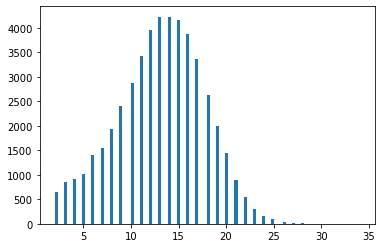

In [29]:
plt.hist([len(x[1]) for x in mod_seqs if len(x[1]) > 1],bins=100)
plt.show()

In [30]:
np.sum([len(pU_seqs),len(m5C_seqs),len(h5mC_seqs),len(m6A_seqs)])

40031